#Least-squares fit of a convex function

In some special cases we can solve interpolation problems involving an infinitedimensional set of functions, using finite-dimensional convex optimization.

**Fitting a convex function to given data**
Perhaps the simplest application is to compute the least-squares fit of a convex function to given data $\left(u_{i}, y_{i}\right), i=1, \ldots, m:$
$$
\text { minimize } \quad \sum_{i=1}^{m}\left(y_{i}-f\left(u_{i}\right)\right)^{2}
$$
subject to $f: \mathbf{R}^{k} \rightarrow \mathbf{R}$ is convex, $\quad \operatorname{dom} f=\mathbf{R}^{k}$
This is an infinite-dimensional problem, since the variable is $f,$ which is in the space of continuous real-valued functions on $\mathbf{R}^{k}$. Using the result above, we can formulate this problem as
$$
\begin{array}{ll}
\operatorname{minimize} & \sum_{i=1}^{m}\left(y_{i}-\hat{y}_{i}\right)^{2} \\
\text { subject to } & \hat{y}_{j} \geq \hat{y}_{i}+g_{i}^{T}\left(u_{j}-u_{i}\right), \quad i, j=1, \ldots, m
\end{array}
$$
which is a QP with variables $\hat{y} \in \mathbf{R}^{m}$ and $g_{1}, \ldots, g_{m} \in \mathbf{R}^{k}$. The optimal value of this problem is zero if and only if the given data can be interpolated by a convex function, i.e., if there is a convex function that satisfies $f\left(u_{i}\right)=y_{i} .$ 


**Bounding values of an interpolating convex function**

As another simple example, suppose that we are given data $\left(u_{i}, y_{i}\right), i=1, \ldots, m$ which can be interpolated by a convex function. We would like to determine the range of possible values of $f\left(u_{0}\right),$ where $u_{0}$ is another point in $\mathbf{R}^{k},$ and $f$ is any convex function that interpolates the given data. To find the smallest possible value of $f\left(u_{0}\right)$ we solve the LP
$$
\begin{array}{ll}
\text { minimize } & y_{0} \\
\text { subject to } & y_{j} \geq y_{i}+g_{i}^{T}\left(u_{j}-u_{i}\right), \quad i, j=0, \ldots, m
\end{array}
$$
which is an $\mathrm{LP}$ with variables $y_{0} \in \mathbf{R}, g_{0}, \ldots, g_{m} \in \mathbf{R}^{k}$. By maximizing $y_{0}$ (which is also an LP) we find the largest possible value of $f\left(u_{0}\right)$ for a convex function that interpolates the given data.

In [ ]:
from cvxopt import solvers, matrix, spmatrix, mul
from pickle import load
solvers.options['show_progress'] = 0

data = load(open("/content/drive/MyDrive/Optimizacion_Convexa/03_Applications_to_modelling/cvxfit.bin",'rb'))
u, y = data['u'], data['y']
m = len(u)

$$
\begin{array}{l}
\min \frac{1}{2}\|\hat{y}-y\|_{2}^{2} \\
S. T. \quad \hat{y}[j] \geq \hat{y}[i]+g[i]^{\prime}(u[j]-u[i]), j, i=0, \ldots, m-1
\end{array}
$$

Variables

$\hat{y}(m), g(m)$


In [ ]:
nvars = 2*m
P = spmatrix(1.0, range(m), range(m), (nvars, nvars))
q = matrix(0.0, (nvars,1))
q[:m] = -y

m blocks (i=0,...,m-1) of linear inequalities
$$
\hat{y}[i]+g[i]^{\prime}(u[j]-u[i]) \leq \hat{y}[j] \quad j, i=0, \ldots, m-1
$$

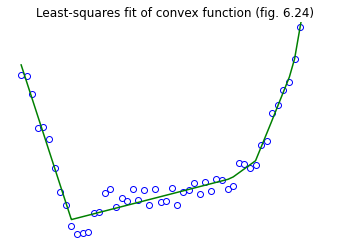

In [ ]:
G = spmatrix([],[],[], (m**2, nvars))
I = spmatrix(1.0, range(m), range(m))
for i in range(m):
    # coefficients of yhat[i]
    G[list(range(i*m, (i+1)*m)), i] = 1.0

    # coefficients of g[i]
    G[list(range(i*m, (i+1)*m)), m+i] = u - u[i]

    # coefficients of yhat[j]
    G[list(range(i*m, (i+1)*m)), list(range(m))] -= I

h = matrix(0.0, (m**2,1))

sol = solvers.qp(P, q, G, h)
yhat = sol['x'][:m]
g = sol['x'][m:]

nopts = 1000
ts = [ 2.2/nopts * t for t in range(1000) ]
f = [ max(yhat + mul(g, t-u)) for t in ts ]

try: import pylab
except ImportError: pass
else:
    pylab.figure(1, facecolor='w')
    pylab.plot(u, y, 'wo', markeredgecolor='b')
    pylab.plot(ts, f, '-g')
    pylab.axis([-0.1, 2.3, -1.1, 7.2])
    pylab.axis('off')
    pylab.title('Least-squares fit of convex function (fig. 6.24)')
    pylab.show()

Figure 6.24 Least-squares fit of a convex function to data, shown as circles.
The (piecewise-linear) function shown minimizes the sum of squared fitting
error, over all convex functions.


## References

* Original problem formulation:
  - S.P. Boyd, and L. Vandenberghe, Chapter 4. Convex Optimization. Cambridge University Press, New York, 2004.